## Decision Tree Classifier

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [28]:
with open("spambase.names") as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
data_set = pd.read_csv("spambase.data", header=None, names=labels +['spam'])
# spam = spamData.pop('spam')

data_array=data_set.values
# print(Data_array)


In [29]:
data_set.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [30]:
print("No of rows in dataset before preprocessing : ", len(data_set))

No of rows in dataset before preprocessing :  4601


### Finding the duplicates in the dataset

In [31]:
data_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

### Dropping the duplicate values

In [32]:
data_set.drop_duplicates(inplace=True)

In [33]:
print("No of rows in dataset after removing duplicates : ", len(data_set))

No of rows in dataset after removing duplicates :  4210


### Finding the null values in the dataset

In [34]:
data_set.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### Removing the target column 

In [35]:
data=data_set.drop(labels=['spam'], axis=1)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [36]:
print("No of rows in dataset after preprocessing : ", len(data_set))

No of rows in dataset after preprocessing :  4210


### Summary of dataset before performing Standard Scaler

In [37]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


### Performing Standard Scaling for the dataset

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
df=pd.DataFrame(data=scaled_data, columns= data.columns)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.347922,1.161025,0.675889,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.525294,-0.164364,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310
1,0.352150,0.368433,0.404391,-0.046644,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,...,-0.116407,-0.160010,-0.043936,-0.164364,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142
2,-0.147901,-0.248027,0.811639,-0.046644,1.315470,0.338207,0.182574,0.029252,1.943000,0.002406,...,-0.116407,-0.120407,-0.003822,-0.164364,-0.006090,0.450365,-0.082129,0.133876,2.169089,3.181179
3,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.025702,-0.164364,-0.170935,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954
4,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.032996,-0.164364,-0.173306,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.685518,-0.248027,0.637104,-0.046644,-0.473040,0.772994,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,0.320730,-0.164364,-0.333407,-0.317325,-0.105071,-0.127986,-0.246243,-0.328464
4206,-0.347922,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.525294,-0.164364,0.085226,-0.317325,-0.105071,-0.115525,-0.241232,-0.448093
4207,0.652181,-0.248027,0.016537,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,0.243945,2.093004,-0.164364,-0.333407,-0.317325,-0.105071,-0.120081,-0.231210,-0.279966
4208,2.852406,-0.248027,-0.565245,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.317435,-0.164364,-0.333407,-0.317325,-0.105071,-0.127835,-0.236221,-0.344630


### Summmary of dataset after performing Standard Scaling

In [39]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,...,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03
mean,-3.480997e-15,-2.548357e-15,3.381328e-15,-2.009289e-15,-7.919384e-15,1.947347e-15,-2.535291e-15,-3.765370e-15,-4.663622e-15,2.867804e-15,...,-3.655752e-15,-3.854122e-15,-1.138071e-15,6.488607e-17,-1.913895e-15,4.962433e-15,-1.364928e-15,2.236631e-16,-7.356480e-16,-1.421138e-16
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,...,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.322705e-01,-2.562653e-01,-4.691088e-01
25%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.133376e-01,-2.261989e-01,-4.060613e-01
50%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-2.590883e-01,-1.643641e-01,-3.144319e-01,-3.173253e-01,-1.050711e-01,-9.313751e-02,-1.861104e-01,-3.066403e-01
75%,-3.479216e-01,-2.480275e-01,2.880349e-01,-4.664436e-02,1.231299e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-8.897950e-02,...,-1.164071e-01,-1.600104e-01,1.821569e-01,-1.643641e-01,5.913558e-02,-9.619715e-02,-1.050711e-01,-5.060267e-02,-4.078958e-02,-2.818053e-02
max,1.478696e+01,3.119145e+01,9.325045e+00,3.160992e+01,1.406769e+01,2.095434e+01,1.800571e+01,2.681886e+01,1.831957e+01,2.731139e+01,...,3.338604e+01,1.720613e+01,3.503689e+01,3.843832e+01,3.818318e+01,2.472857e+01,4.538756e+01,3.310208e+01,4.979423e+01,2.513787e+01


# Performing PCA to the Dataset

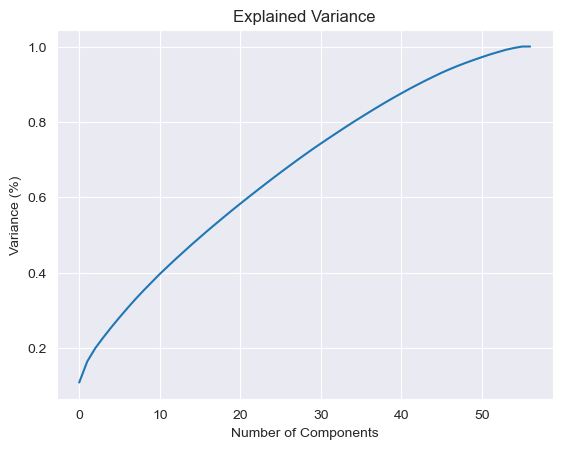

In [40]:
from sklearn.decomposition import PCA
pca = PCA()

principalComponents = pca.fit_transform(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

plt.title('Explained Variance')
plt.grid(True)
plt.show()

### Introducing the PCA components

In [41]:
pca = PCA(n_components=44)
new_data = pca.fit_transform(df)

# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                         'PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                         'PC41','PC42','PC43','PC44'])

### Dataset after performing PCA

In [42]:
principal_Df.head()
# principal_Df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-0.766904,0.049606,-0.643875,0.037407,-0.253857,-0.329156,-0.084669,0.350031,1.751397,0.181094,...,0.356583,-0.323779,0.250176,0.130618,0.266036,0.082869,0.213682,0.197505,-0.392375,0.238026
1,-1.293574,2.007026,0.071431,-0.481314,-0.099461,-1.117721,-0.545215,0.250821,-0.309649,-0.630237,...,-0.254042,-0.085537,-0.484879,-0.183918,0.132231,0.080242,0.244613,0.543362,0.011079,0.314342
2,-1.612746,4.821307,3.137266,-1.073406,1.591367,-1.500046,-3.174360,-1.398328,1.032045,2.520403,...,2.072603,0.038726,-0.725294,-0.284519,-0.316431,0.939188,0.852088,0.549659,0.307206,-0.752809
3,-0.857217,0.414170,-0.551327,-0.031382,-0.050043,0.703119,0.339557,-0.445285,-0.366374,0.183628,...,0.338444,-0.070410,0.053546,0.260449,-0.317179,0.469294,0.801324,-0.625668,0.345719,-0.307405
4,-0.858070,0.413502,-0.553451,-0.031642,-0.050069,0.703737,0.337812,-0.446570,-0.366710,0.183219,...,0.337765,-0.070582,0.055176,0.260946,-0.317144,0.469805,0.800514,-0.624342,0.345618,-0.306408


In [43]:
print(pca.explained_variance_)

[6.21425733 3.18296901 2.01337294 1.62941211 1.54593978 1.46864572
 1.4159321  1.36728178 1.29484715 1.24508322 1.23604831 1.14931788
 1.14403949 1.10352052 1.09710169 1.06431796 1.05386372 1.02433393
 1.01639166 1.0012228  0.97906785 0.9680838  0.95328081 0.94497249
 0.93804692 0.91811905 0.90394463 0.89562877 0.87379351 0.86522247
 0.83047875 0.81861106 0.81022366 0.80213055 0.78871007 0.75975492
 0.75800505 0.74219678 0.72620054 0.70241448 0.68155843 0.67083755
 0.63851219 0.62607351]


In [44]:
print(pca.components_)

[[-0.04690805 -0.02058001 -0.05221265 ... -0.02020216 -0.03395573
  -0.04960885]
 [ 0.14443583  0.11188826  0.14576681 ...  0.13599234  0.23902267
   0.20847264]
 [-0.03012423 -0.02135108 -0.03047881 ...  0.30345193  0.46504845
   0.38998123]
 ...
 [-0.14852792  0.21174198 -0.00430471 ... -0.09256779  0.04789351
   0.4766731 ]
 [ 0.11877299  0.1309036   0.06749208 ... -0.09984923  0.0362438
   0.0803246 ]
 [ 0.1265083  -0.26389831  0.00847949 ... -0.16057595 -0.017656
   0.37525768]]


## Build the predictive model by appling K-Nearest Neighbors (KNN) algorithm

In [45]:
X = principal_Df.iloc[:,0:44].values
y = data_set.iloc[:, 57].values

### Splitting the dataset into the Training set and Test set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Fitting classifier to the Training set

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Accuracy of testing dataset

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
predictions_test=clf.predict(X_test)
accuracy_score(y_test, predictions_test)

0.8729216152019003

### Checking accuracy of training dataset


In [51]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9994061757719715

### Visualizing our final decision tree


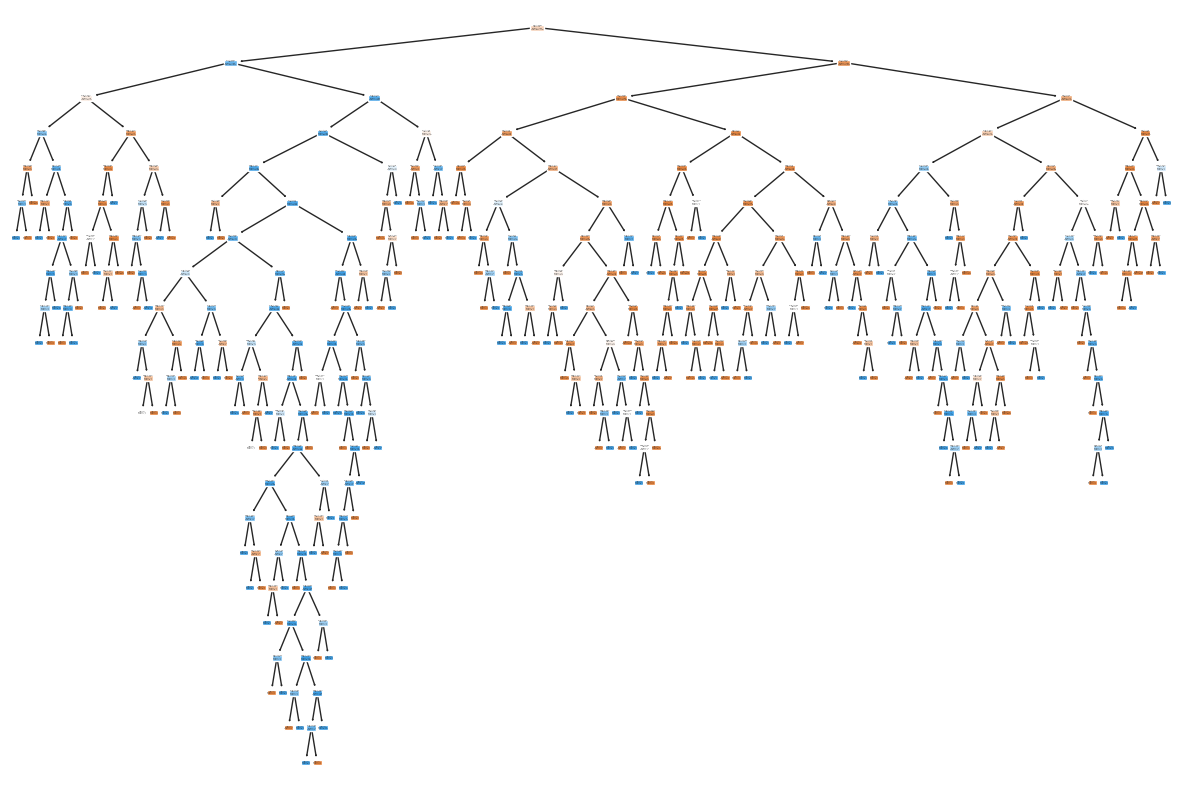

In [52]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()